In [1]:
import glob
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import scipy.io as sio
import biosppy 
from statsmodels.tsa.stattools import adfuller

In [2]:
import pandas as pd
import glob

# Get a list of all CSV files in a directory
mat_files_control = glob.glob(r'C:\Users\compu\Documents\bioseñales lab\proyecto3-parte2\datos_senales_datos_parkinson_cursos\control/*.mat')
mat_files_parkinson = glob.glob(r'C:\Users\compu\Documents\bioseñales lab\proyecto3-parte2\datos_senales_datos_parkinson_cursos\parkinson/*.mat')

print(mat_files_control[0])
print(mat_files_parkinson[0])

C:\Users\compu\Documents\bioseñales lab\proyecto3-parte2\datos_senales_datos_parkinson_cursos\control\C001R_EP_reposo.mat
C:\Users\compu\Documents\bioseñales lab\proyecto3-parte2\datos_senales_datos_parkinson_cursos\parkinson\P001_EP_reposo.mat


In [3]:
print(len(mat_files_control))
print(len(mat_files_parkinson))

36
23


In [4]:
import scipy.io
emptydict_parkinson={}
for i in range(len(mat_files_parkinson)):
    mat = scipy.io.loadmat(mat_files_parkinson[i])
    mat=mat["data"]
    emptydict_parkinson[i]=mat

In [5]:
import scipy.io
emptydict_control={}
for i in range(len(mat_files_control)):
    mat = scipy.io.loadmat(mat_files_control[i])
    mat=mat["data"]
    emptydict_control[i]=mat

In [6]:
emptydict_parkinson.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])

In [7]:
emptydict_control.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])

In [8]:
data_control=emptydict_control[0]
print("Variable python: " + str(type(data_control)))
#características básicas de ndarray
print("Tipo de variable cargada: " + str(data_control.dtype))
print("Dimensiones de los datos cargados: " + str(data_control.shape))
print("Numero de dimensiones: " + str(data_control.ndim))
print("Tamanio: " + str(data_control.size))
print("Tamanio en memoria (bytes): " + str(data_control.nbytes))

Variable python: <class 'numpy.ndarray'>
Tipo de variable cargada: float64
Dimensiones de los datos cargados: (8, 2000, 180)
Numero de dimensiones: 3
Tamanio: 2880000
Tamanio en memoria (bytes): 23040000


In [9]:
data_control.shape

(8, 2000, 180)

In [10]:
data_control[7,:,0].shape

(2000,)

In [11]:
data_control[:][:][1]

array([[ 3.08605552, -2.45733762,  4.77996063, ...,  0.119307  ,
        -1.99329913,  2.85233068],
       [ 3.00134563, -2.68047833,  4.58941746, ...,  0.32975972,
        -1.44358563,  2.57325554],
       [ 2.91350245, -2.90499258,  4.41915941, ...,  0.57040775,
        -0.85715955,  2.25846601],
       ...,
       [-2.55538917,  4.22154522, -3.57884908, ..., -2.39834189,
         6.14394331,  5.51967716],
       [-2.65759897,  4.21561861, -3.87329578, ..., -2.25397921,
         6.13757133,  5.47042465],
       [-2.74193263,  4.21254396, -4.11765242, ..., -2.11529231,
         6.0955615 ,  5.41578436]])

In [12]:
senal_continua = np.reshape(data_control,(data_control.shape[0],data_control.shape[1]*data_control.shape[2]),order='F')
senal_continua.shape

(8, 360000)

Dimensiones de los datos cargados: (8, 360000)
(360000,)


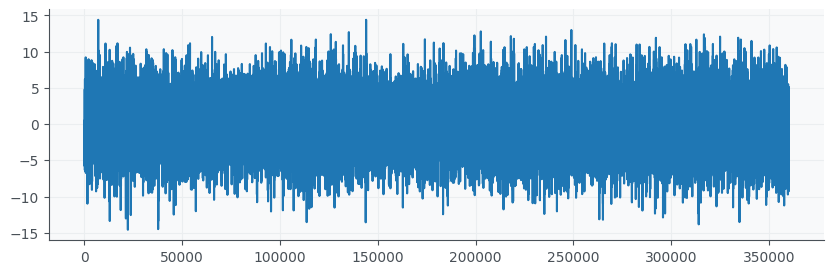

In [13]:
print("Dimensiones de los datos cargados: " + str(senal_continua.shape))
fig = plt.figure(figsize=(10,3))
#fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.plot(senal_continua[7,:])
print(np.squeeze(senal_continua[7,:]).shape)
plt.show()

In [14]:
def signal_average_energy(s):
    return (1/s.size)*(np.sum(np.square(np.abs(s))))
    

In [15]:
def signal_energy(s):
    return (np.sum(np.square(np.abs(s))))

In [16]:
signal_average_energy(senal_continua[0,:])

10.73282517908116

In [17]:
energy_dict={}
def punto1(señal):
    temporalmente_continuo = np.reshape(señal,(señal.shape[0],señal.shape[1]*señal.shape[2]),order='F')
    for ii in range(señal.shape[0]):
        energy_dict["channel " + str(ii+1)]=signal_average_energy(temporalmente_continuo[ii,:])


In [18]:
emptydict_control[33].shape

(8, 2000, 161)

In [19]:
punto1(emptydict_control[0])

In [20]:
energy_dict

{'channel 1': 10.73282517908116,
 'channel 2': 10.492953956010412,
 'channel 3': 11.38007479412437,
 'channel 4': 9.25282014181638,
 'channel 5': 14.865081512905078,
 'channel 6': 12.622079036278844,
 'channel 7': 11.390663793654475,
 'channel 8': 12.329299755832064}

Funcion de energia promediada por epocas 

In [21]:
energy_dict={}
def punto2(señal):
    for i in range(señal.shape[0]):
       energy_sum=0
       energia_promediada_epocas=0
       for ii in range(señal.shape[2]):
        datos_epoca=señal[i,:,ii]
        energy_sum+=signal_energy(datos_epoca)
        if ii==señal.shape[2]-1:
           energia_promediada_epocas=energy_sum/señal.shape[2]
           energy_dict["channel " + str(i+1)]=energia_promediada_epocas
           
    return(energy_dict)
   

In [22]:
punto2(data_control)

{'channel 1': 21465.650358162315,
 'channel 2': 20985.907912020815,
 'channel 3': 22760.149588248736,
 'channel 4': 18505.64028363276,
 'channel 5': 29730.163025810172,
 'channel 6': 25244.158072557693,
 'channel 7': 22781.327587308944,
 'channel 8': 24658.59951166414}

In [23]:
emptydict_control[12].shape

(8, 2000, 179)

In [24]:
var=emptydict_control[0]
var2=signal_energy(var[0,:,1])
var2


21623.107573749945

In [25]:
# Se crea un DataFrame vacío para almacenar los resultados
output_control = pd.DataFrame()
# Se itera sobre todos los sujetos
for i in range(36):
    # Se limpia el diccionario para cada sujeto
    energy_dict = {}
    # Se calculan las métricas para el sujeto actual
    punto2(emptydict_control[i])
    # Se crea un DataFrame a partir del diccionario y se concatena al DataFrame de salida
    df_dictionary = pd.DataFrame([energy_dict])
    output_control = pd.concat([output_control, df_dictionary], ignore_index=True)

dic_index = {"sujetos": []}
for i in range(1, 37):
    dic_index["sujetos"].append("sujeto " + str(i))
output_control.index=(dic_index["sujetos"])
output_control

,channel 1,channel 2,channel 3,channel 4,channel 5,channel 6,channel 7,channel 8
sujeto 1,21465.650358,20985.907912,22760.149588,18505.640284,29730.163026,25244.158073,22781.327587,24658.599512
sujeto 2,15966.402868,17617.810248,20804.937129,19654.400017,16678.982063,93894.049009,66862.496275,75685.125872
sujeto 3,14148.673322,18283.999666,28749.932148,14270.726911,28787.445978,14661.417740,15940.154095,19499.898656
sujeto 4,35311.301696,34916.686010,38800.429029,35427.031127,35905.472869,106598.128152,106885.575966,112520.750636
sujeto 5,18510.829979,19738.489375,20911.792748,21828.254399,23351.992649,53086.059766,37495.972475,43067.095504
sujeto 6,13180.109317,13925.217812,16218.994223,12324.883659,14060.300659,25767.024864,21935.759622,22827.781293
sujeto 7,11197.554574,10948.368805,12737.004665,10745.161921,10329.642418,21461.605831,15493.212776,27414.375247
sujeto 8,28551.124065,26204.839254,17383.998956,17244.605933,26206.372422,83370.618408,51121.105722,67852.348256
sujeto 9,9133.036290,9214.155028,11626.411811,10809.621612,10467.879938,46336.873547,45695.801756,50086.361637
sujeto 10,47166.556798,55107.798641,52286.884667,34682.656928,30606.119338,227045.733387,224891.029478,322172.431642


In [26]:
# Se crea un DataFrame vacío para almacenar los resultados
output_parkinson = pd.DataFrame()
# Se itera sobre todos los sujetos
for i in range(23):
    # Se limpia el diccionario para cada sujeto
    energy_dict = {}
    # Se calculan las métricas para el sujeto actual
    punto2(emptydict_parkinson[i])
    # Se crea un DataFrame a partir del diccionario y se concatena al DataFrame de salida
    df_dictionary = pd.DataFrame([energy_dict])
    output_parkinson = pd.concat([output_parkinson, df_dictionary], ignore_index=True)

dic_index = {"paciente": []}
for i in range(1, 24):
    dic_index["paciente"].append("paciente " + str(i))
output_parkinson.index=(dic_index["paciente"])
output_parkinson

,channel 1,channel 2,channel 3,channel 4,channel 5,channel 6,channel 7,channel 8
paciente 1,12438.243570,11261.175800,10819.634775,9489.784462,12091.060945,22798.213463,23700.620349,25606.065340
paciente 2,17995.660058,12001.601821,12286.344400,14785.908284,17058.433161,63983.449318,53715.460772,66403.639479
paciente 3,38092.102574,43575.379457,41979.994799,41715.287990,46513.737045,251649.394709,179345.438488,262361.180410
paciente 4,23742.325612,22070.007569,24540.315612,21803.936448,22594.339745,128314.264805,128888.485633,152799.284248
paciente 5,48574.518921,51806.529769,73171.952374,59707.699631,56552.175747,287105.761622,222745.793414,353312.298104
paciente 6,16202.416566,13124.247855,13988.674335,12752.027365,15784.724049,50730.233172,50742.237835,73694.061647
paciente 7,10692.948223,10841.187262,12154.390086,24161.685202,14789.173543,43302.825848,42560.941845,39043.973220
paciente 8,12157.229828,13398.658526,17668.877657,14841.104693,11297.742247,38701.647608,41828.973929,61328.610990
paciente 9,9581.810471,14008.572615,9589.230257,9374.085669,8154.941858,28970.848994,40705.897395,36624.858559
paciente 10,23658.738825,23990.255991,30633.745996,22888.894132,19932.315538,65161.432397,60552.834862,58441.048743


In [27]:
Sujeto1_control=output_control.iloc[:,2]
Sujeto1_parkinson=output_parkinson.iloc[:,2]
Sujeto4_control=output_control.iloc[:,5]
Sujeto4_parkinson=output_parkinson.iloc[:,5]

In [28]:
canales=output_control.columns.values[0:8]
canales

array(['channel 1', 'channel 2', 'channel 3', 'channel 4', 'channel 5',
       'channel 6', 'channel 7', 'channel 8'], dtype=object)

In [29]:
for i in range(len(canales)):  
    infocanal_control=output_control.loc[:,[canales[i]]]
    infocanal_parkinson=output_parkinson.loc[:,[canales[i]]]
    #          Para canales
    # Prueba de NORMALIDAD , Kolmogorov-Smirnov
    value1_control=stats.kstest(infocanal_control,"norm")
    value1_parkinson=stats.kstest(infocanal_parkinson,"norm")
    print("VALOR P, PRUEBA DE NORMALIDAD PARA CANAL " + str(i+1))
    print(f"P value  control: {value1_control.pvalue}")
    print(f"P value parkinson: {value1_parkinson.pvalue}")

    # Prueba de HOMOCEDASTICIDAD, levene
    value1_levene=stats.levene(infocanal_control,infocanal_parkinson)
    print("VALOR P, PRUEBA DE HOMOCEDASTICIDAD PARA CANAL "+ str(i+1))
    print(f"P value: {value1_levene.pvalue}")
    print("------------------------------------------------------------")

VALOR P, PRUEBA DE NORMALIDAD PARA CANAL 1
P value  control: [0.]
P value parkinson: [0.]
VALOR P, PRUEBA DE HOMOCEDASTICIDAD PARA CANAL 1
P value: [0.884802]
------------------------------------------------------------
VALOR P, PRUEBA DE NORMALIDAD PARA CANAL 2
P value  control: [0.]
P value parkinson: [0.]
VALOR P, PRUEBA DE HOMOCEDASTICIDAD PARA CANAL 2
P value: [0.95909264]
------------------------------------------------------------
VALOR P, PRUEBA DE NORMALIDAD PARA CANAL 3
P value  control: [0.]
P value parkinson: [0.]
VALOR P, PRUEBA DE HOMOCEDASTICIDAD PARA CANAL 3
P value: [0.97763379]
------------------------------------------------------------
VALOR P, PRUEBA DE NORMALIDAD PARA CANAL 4
P value  control: [0.]
P value parkinson: [0.]
VALOR P, PRUEBA DE HOMOCEDASTICIDAD PARA CANAL 4
P value: [0.75925285]
------------------------------------------------------------
VALOR P, PRUEBA DE NORMALIDAD PARA CANAL 5
P value  control: [0.]
P value parkinson: [0.]
VALOR P, PRUEBA DE HOMOC

Para comprobar los supuestos se llevaron a cabo pruebas de normalidad y homocedasticidad para cada canal, en cada caso se seleccionó uno de control y uno con Parkinson. Respecto a la homocedasticidad se encontró que los dos respectivos canales cumplían con este supuesto, sin embargo en la prueba de normalidad los valores p obtenidos en cada canal  fueron inferiores al nivel de significancia establecido (5%). Debido a este resultado, se tomó la decisión de emplear una prueba no paramétrica en lugar de la prueba t.

Se establece entonces:
H0: No hay diferencia significativa entre las medianas de los potenciales eléctricos registrados en los canales de EEG de los pacientes de prueba y los pacientes con Parkinson. 
H1: Existe una diferencia significativa entre las medianas de los potenciales eléctricos registrados en los canales de EEG de los pacientes de prueba y los pacientes con Parkinson. 

In [30]:
for i in range(len(canales)):  
    infocanal_control=output_control.loc[:,[canales[i]]]
    infocanal_parkinson=output_parkinson.loc[:,[canales[i]]]

    # prueba Mann-Whitney
    value1=stats.mannwhitneyu(infocanal_control,infocanal_parkinson)

    print("PRUEBA Mann-Whitney para canal " +str(i+1))
    print(f" P value sujetos 1: {value1.pvalue}")
    print("-------------------------------------------")


PRUEBA Mann-Whitney para canal 1
 P value sujetos 1: [0.40570057]
-------------------------------------------
PRUEBA Mann-Whitney para canal 2
 P value sujetos 1: [0.5705282]
-------------------------------------------
PRUEBA Mann-Whitney para canal 3
 P value sujetos 1: [0.46037289]
-------------------------------------------
PRUEBA Mann-Whitney para canal 4
 P value sujetos 1: [0.23446185]
-------------------------------------------
PRUEBA Mann-Whitney para canal 5
 P value sujetos 1: [0.56001751]
-------------------------------------------
PRUEBA Mann-Whitney para canal 6
 P value sujetos 1: [0.28007476]
-------------------------------------------
PRUEBA Mann-Whitney para canal 7
 P value sujetos 1: [0.11830082]
-------------------------------------------
PRUEBA Mann-Whitney para canal 8
 P value sujetos 1: [0.15054429]
-------------------------------------------


Para ambos grupos se obtuvo un p value mayor a nivel de significancia establecido, es decir a partir de la prueba no se pudo detectar diferencias significativas entre las medianas de los potenciales eléctricos registrados en los canales de EEG de los pacientes de prueba y los pacientes con Parkinson. Aunque se esperaba que los pacientes de prueba y los pacientes con Parkinson difirieran en cuanto a los potenciales eléctricos registrados en los canales de EEG, es posible que haya una gran variabilidad dentro de cada grupo. En los datos suministrados no se especifica que las personas tomadas sean por ejemplo de la misma edad, género o que estén en cierta etapa de la enfermedad lo que podría afectar los resultados. Se descarta que a partir de la prueba de Mann-Whitney se haya aceptado incorrectamente la hipótesis nula, ya que los valores p son significativamente mayor a 0.05, se recomienda usar una metrica distinta para lograr evidenciar las diferencias fisiologicas entre personas con y sin esta patologia  